<a href="https://colab.research.google.com/github/imThili/Cannon-game/blob/master/final_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install needed libraries

!pip install -q sklearn

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

# Unzip and read the dataset as a pandas dataframe
!unzip 'dataframe.zip'

df=pd.read_csv('dataframe.csv', delimiter=';')

Archive:  dataframe.zip
  inflating: dataframe.csv           


In [ ]:
# Check if the dataframe contains any null values
df.isnull().sum()

n1          0
n4          0
n31         0
n54         0
n105        0
n114        0
n163        0
n188        0
n215        0
n229        0
n288        0
n296        0
n332        0
n342        0
n410        0
n415        0
n429        0
n458        0
n469        0
n495        0
n506        0
n516        0
n519        0
n549        0
n613        0
n636        0
n644        0
n679        0
n722        0
n726        0
n740        0
n752        0
n769        0
leakages    0
dtype: int64

In [ ]:
# Seperate Target Variable and Predictor Variables
TargetVariable=["leakages"]
Predictors = ['n1', 'n4', 'n31', 'n54','n105','n114','n163','n188','n215','n229','n288','n296','n332','n342','n410','n415','n429','n458','n469','n495','n506','n516','n519','n549','n613','n636','n644','n679','n722','n726','n740','n752','n769']

x=df[Predictors].values
y=df[TargetVariable].values

In [ ]:
# Create training, validation and testing datasets
from sklearn.model_selection import train_test_split
x_train_1, x_test, y_train_1, y_test = train_test_split(x, y, test_size=0.20, random_state = 123)
x_train, x_val, y_train, y_val = train_test_split(x_train_1, y_train_1, test_size = 0.05, random_state = 123)

In [ ]:
# Check shapes
print(x_train.shape)
print(y_train.shape)

(159782, 33)
(159782, 1)


In [ ]:
# Scale data
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

# Store the fit object for later reference
PredictorScalerFit = sc_x.fit(x_train)

# Transform data
x_train_new = PredictorScalerFit.transform(x_train)

In [ ]:
# transform test and validation data
x_test_new = sc_x.transform(x_test)
x_val_new = sc_x.transform(x_val)

In [ ]:
# Visualization Function for Metrics
epoch = 75
def plot_learningCurve(history):
  # Plot training and validation accuracy values
  epoch_range = range(1, epoch+1)
  # Plot the mae vs epoch of training set

  # Plot training and validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.ylim([0, 4])
  plt.title('4 layer model mse')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc = 'upper right')
  plt.show()

Epoch 1/75
10653/10653 [==============================] - 47s 4ms/step - loss: 1.8813 - mae: 0.9719 - val_loss: 0.9849 - val_mae: 0.7619
Epoch 2/75
10653/10653 [==============================] - 29s 3ms/step - loss: 0.7931 - mae: 0.6553 - val_loss: 0.6554 - val_mae: 0.5926
Epoch 3/75
10653/10653 [==============================] - 29s 3ms/step - loss: 0.6592 - mae: 0.5857 - val_loss: 0.7863 - val_mae: 0.6422
Epoch 4/75
10653/10653 [==============================] - 29s 3ms/step - loss: 0.5940 - mae: 0.5464 - val_loss: 0.4745 - val_mae: 0.4957
Epoch 5/75
10653/10653 [==============================] - 29s 3ms/step - loss: 0.5302 - mae: 0.5112 - val_loss: 0.4350 - val_mae: 0.4559
Epoch 6/75
10653/10653 [==============================] - 29s 3ms/step - loss: 0.5064 - mae: 0.4943 - val_loss: 0.6761 - val_mae: 0.5536
Epoch 7/75
10653/10653 [==============================] - 29s 3ms/step - loss: 0.4895 - mae: 0.4830 - val_loss: 0.4864 - val_mae: 0.4906
Epoch 8/75
10653/10653 [=================

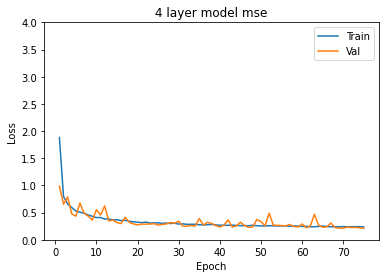

test mse : 0.20422105491161346


In [ ]:
# Create model with 4 hidden layer
model = tf.keras.Sequential([
 tf.keras.layers.Dense
 (128 , activation = 'relu' ,
 input_shape = (33, )),
 tf.keras.layers.Dense
 (64 , activation = 'relu'),
 tf.keras.layers.Dense
 (32 , activation = 'relu'),
 tf.keras.layers.Dense
 (16 , activation = 'relu'),
 tf.keras.layers.Dense(1)
])

# Using the Adam Optimizer
model.compile(optimizer = 'adam' ,
 loss = 'mse' ,
 metrics = ['mae'])

# Fit and train small model
history = model.fit(x_train_new, y_train ,
 batch_size = 15,
 epochs = 75,verbose = 1,
 validation_data =
 (x_val_new , y_val))

# Evaluate small model
plot_learningCurve(history)

s_test_loss , s_test_mae = model.evaluate(x_test_new , y_test ,
 batch_size = 15 , verbose = 0)
print("test mse : {}"
 .format(s_test_loss))

In [ ]:
# Generating Predictions on testing data
Predictions=model.predict(x_test_new)

# Scling the test data back to original scales
Test_Data = PredictorScalerFit.inverse_transform(x_test_new)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['actual_leakages']=y_test
TestingData['predicted_leakages']=Predictions

TestingData.iloc[1:11]

1314/1314 [==============================] - 2s 2ms/step


,n1,n4,n31,n54,n105,n114,n163,n188,n215,n229,...,n636,n644,n679,n722,n726,n740,n752,n769,actual_leakages,predicted_leakages
1,27.45,32.54,35.89,36.94,49.87,53.10,52.02,54.76,39.09,52.08,...,45.11,47.10,46.84,45.75,46.63,43.61,48.65,48.11,3,3.055167
2,27.94,32.82,36.46,36.07,49.78,53.16,51.23,53.97,39.09,51.24,...,44.41,46.28,46.14,45.21,45.93,43.35,47.92,47.59,10,9.893402
3,28.40,33.51,36.83,36.35,50.21,53.63,51.92,54.66,39.07,51.69,...,44.86,46.79,46.64,45.49,46.40,43.50,48.43,47.95,13,13.056177
4,28.19,33.25,36.74,36.18,50.05,53.46,51.72,54.48,39.09,51.70,...,44.82,46.82,46.63,45.59,46.43,43.53,48.45,47.96,5,5.461664
5,28.97,34.18,37.46,38.18,50.88,54.40,53.25,55.98,39.10,53.26,...,46.10,48.21,47.80,46.48,47.53,43.97,49.59,48.82,2,2.685657
6,27.97,33.10,36.40,35.79,49.71,52.99,51.36,54.14,38.95,50.52,...,44.46,46.46,46.41,45.46,46.29,43.48,48.32,47.87,4,4.000947
7,28.59,33.65,37.12,34.91,49.36,52.66,50.50,53.26,39.09,50.63,...,43.94,45.84,45.89,45.10,45.77,43.30,47.77,47.47,9,8.915066
8,28.54,33.58,36.91,37.08,50.51,53.96,52.54,55.29,39.09,52.46,...,45.46,47.52,47.21,46.03,46.96,43.76,48.95,48.38,5,4.787362
9,28.48,33.60,36.91,36.56,50.39,53.84,52.17,54.93,39.06,51.85,...,45.05,46.93,46.84,45.79,46.64,43.64,48.64,48.12,13,13.819656
10,27.35,32.52,35.91,34.30,49.23,52.52,49.97,52.74,39.09,50.00,...,43.41,45.20,45.32,44.65,45.21,43.08,47.18,47.05,10,9.903734


In [ ]:
import math
RMSE = math.sqrt(s_test_loss)
print("RMSE: ", RMSE)

RMSE:  0.4519082372690428


In [ ]:
# Create dataframe with predicted leakages and actual leakages as columns
pred_df = TestingData[['actual_leakages', 'predicted_leakages']].copy()
pred_df.sort_values(by=['actual_leakages'], inplace=True)

# Export the dataframe as csv
pred_df.to_csv('predictions.csv')

In [ ]:
pred_df.head()

,actual_leakages,predicted_leakages
27545,0,0.319923
3277,0,0.505746
3272,0,0.329595
28294,0,0.996125
28334,0,0.488402


In [ ]:
pred_df.tail()

,actual_leakages,predicted_leakages
38999,16,15.898811
15047,16,15.989632
19266,16,15.710260
38826,16,15.923895
33175,16,16.058626
